# Ex. 2
Please fill-in your ID in the following cell, *No Names!*

Then fill your names in the next two cells.

In [1]:
id1 = "316390053"

name_student_1 = "bar, gavriely"

import pandas as pd
pd.set_option('display.max_rows', 15)

df = pd.DataFrame([id1])
# Uncomment in case two students are doing the assignment together
# df = pd.DataFrame([id1])df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)
vacc_df1 = vacc_df.copy()
%matplotlib inline

q1

In [2]:
bangl=vacc_df1[vacc_df1.loc[:,'location'].str.contains('Bangladesh')]
bangl.head(3)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
2195,Bangladesh,BGD,2021-01-26,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2196,Bangladesh,BGD,2021-01-27,26.0,26.0,NaN,26.0,26.0,0.0,0.0,NaN,0.0
2197,Bangladesh,BGD,2021-01-28,567.0,567.0,NaN,541.0,284.0,0.0,0.0,NaN,2.0


q2

In [3]:
bangl.isnull().sum()
#ישנם שני עמודות בעלות ערך ריק מקסימלי חיסונים למאה+אנשים מחוסנים לגמרי
bangl.isnull().sum().max()
#הערך המקסימלי

95

q3

In [4]:
dailyB=bangl[pd.isnull(bangl['daily_vaccinations'])]
dailyB 

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
2195,Bangladesh,BGD,2021-01-26,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN


 q4

In [5]:
dailyB.fillna("0" , inplace=True)
#הסיבה דיי פשוטה מכיוון שזה היום הראשון סביר להניח שפשוט אף אחד לא התחסן

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


q5

<AxesSubplot:ylabel='Frequency'>

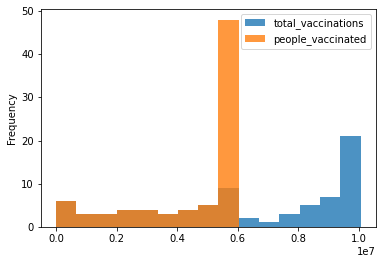

In [6]:
Histo1=bangl[['total_vaccinations','people_vaccinated']]
Histo1.dropna()
Histo1.plot.hist(bins=15,alpha=0.8)

q6

people_fully_vaccinated_per_hundred    2.15
dtype: float64

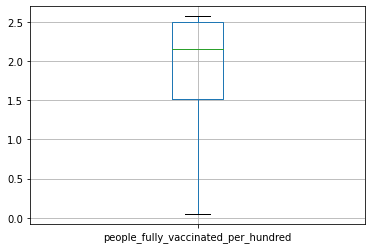

In [7]:
bangl.boxplot('people_fully_vaccinated_per_hundred')
bangl[['people_fully_vaccinated_per_hundred']].median()
#הערך מתאים לחציון

q7

In [8]:
bangl['date']=pd.to_datetime(bangl.date)
bangl['month']=pd.DatetimeIndex(bangl.date).month
bangl.groupby('month')[['daily_vaccinations','people_vaccinated_per_hundred']].max()

<ipython-input-8-de0716c7200c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangl['date']=pd.to_datetime(bangl.date)
<ipython-input-8-de0716c7200c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangl['month']=pd.DatetimeIndex(bangl.date).month


,daily_vaccinations,people_vaccinated_per_hundred
month,,
1,1949.0,0.00
2,196796.0,1.89
3,131123.0,3.26
4,161375.0,3.53
5,108320.0,3.54
6,13019.0,3.54


q8

In [9]:
data=bangl.groupby('month')[['daily_vaccinations','people_vaccinated_per_hundred']].max()
data[['people_vaccinated_per_hundred']].sort_values

<bound method DataFrame.sort_values of        people_vaccinated_per_hundred
month                               
1                               0.00
2                               1.89
3                               3.26
4                               3.53
5                               3.54
6                               3.54>